In [5]:
import pandas as pd
from konlpy.tag import Hannanum
hannanum = Hannanum() #한나눔 분석기
df = pd.read_csv('c:/data/text/군집분석데이터.csv',engine="python", encoding='ms949')
df.head()

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
docs = []
for i in df['기사내용']: 
    #명사 추출
    docs.append(hannanum.nouns(i))
#단어에 공백을 추가
for i in range(len(docs)):
    docs[i] = ' '.join(docs[i])
#print(docs[:2])
vec = CountVectorizer()
X = vec.fit_transform(docs)
df2 = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df2.head())

   10대  10배  10분  12억500  12억500만달러  12억5500  12억5500만달러  12억5천500  15명  16  \
0    0    0    0       0          1        0           1         0    0   0   
1    0    0    0       1          0        0           1         0    0   0   
2    0    0    0       1          0        1           0         0    0   0   
3    0    0    0       1          0        0           0         1    0   0   
4    0    0    0       0          0        0           1         0    0   0   

   ...  협조  호소력  홈페이지  확대  확인  확충  환경부  활동  후보물질  흡연  
0  ...   0    0     0   0   0   0    0   0     0   0  
1  ...   0    0     0   0   0   0    0   0     0   0  
2  ...   0    0     0   0   0   0    0   0     0   0  
3  ...   0    0     0   0   0   0    0   0     0   0  
4  ...   0    0     0   0   0   0    0   0     1   0  

[5 rows x 581 columns]


c:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


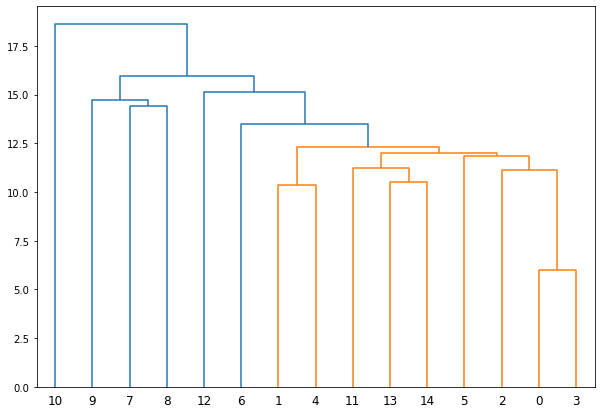

In [7]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
# 계층적 클러스터링 : 하나의 데이터 샘플을 하나의 클러스터로 보고 가장 유사도가 높은 클러스터를 합치면서 클러스터 갯수를 줄여가는 방법
# 클러스터수를 3으로 설정
cluster = AgglomerativeClustering(n_clusters=3)
cluster.fit_predict(df2)
# 트리를 나타내는 다이어그램
plt.figure(figsize=(10, 7))
result=shc.linkage(df2)
shc.dendrogram(result) # 덴드로그램 출력
plt.show()

In [12]:
from sklearn.cluster import KMeans
# 군집 개수를 3으로 설정(클러스터링)
kmeans = KMeans(n_clusters=3,random_state=10).fit(df2)
kmeans.labels_

c:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2])

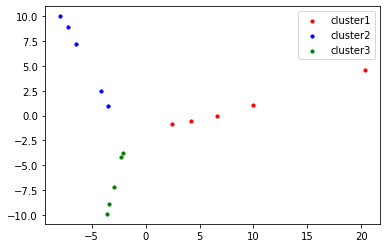

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# 플로팅을 위하여 ca 기법( 주성분분석 )으로 차원을 2차원으로 축소
pca = PCA(n_components=2,random_state=10)
components = pca.fit_transform(df2)
df3 = pd.DataFrame(data = components, columns = ['component 1', 'component 2'])
df3.index=df['검색어']
# x축 : first, y축 : second 번호로 나타낸 후 시각화
plt.scatter(df3.iloc[cluster.labels_ == 0, 0], df3.iloc[cluster.labels_ == 0, 1], s = 10, c = 'red', label = 'cluster1')
plt.scatter(df3.iloc[cluster.labels_ == 1, 0], df3.iloc[cluster.labels_ == 1, 1], s = 10, c = 'blue', label = 'cluster2')
plt.scatter(df3.iloc[cluster.labels_ == 2, 0], df3.iloc[cluster.labels_ == 2, 1], s = 10, c = 'green', label = 'cluster3')
plt.legend()
plt.show()